In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    finalNumber1: int
    finalNumber2: int

In [3]:
def adder1(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""

    state['finalNumber1'] = state['number1'] + state['number2']
    return state

def subtractor1(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""

    state['finalNumber1'] = state['number1'] - state['number2']
    return state

def decide_next_node1(state: AgentState) -> AgentState:
    """This node decides on the next node to go to"""

    if state['operation1'] == '+':
        return "addition_operation1"

    elif state['operation1'] == '-':
        return "subtraction_operation1"

def adder2(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""

    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subtractor2(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""

    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def decide_next_node2(state: AgentState) -> AgentState:
    """This node decides on the next node to go to"""

    if state['operation2'] == '+':
        return "addition_operation2"

    elif state['operation2'] == '-':
        return "subtraction_operation2"
       

In [4]:
graph = StateGraph(AgentState)

graph.add_node("router1", lambda state:state) # passthrough function
graph.add_node("add_node1", adder1)
graph.add_node("subtract_node1", subtractor1)
graph.add_node("router2", lambda state:state) # passthrough function
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decide_next_node1,
    {
        # Edge: Node
        "addition_operation1": "add_node1",
        "subtraction_operation1": "subtract_node1"
    }
)

graph.add_edge("add_node1", "router2")
graph.add_edge("subtract_node1", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        # Edge: Node
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

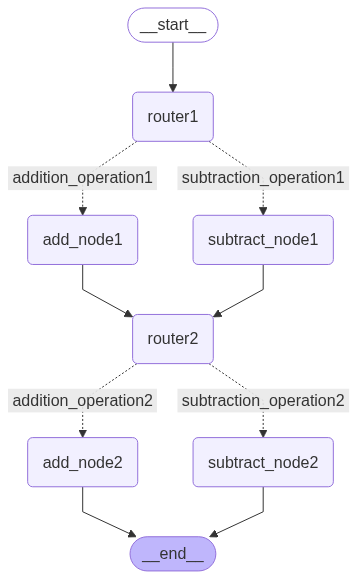

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
initial_state = AgentState(number1 = 10, operation1="-", number2 = 5, number3 = 7, operation2="+", number4 = 2)
print(app.invoke(initial_state))

{'number1': 10, 'number2': 5, 'number3': 7, 'number4': 2, 'operation1': '-', 'operation2': '+', 'finalNumber1': 5, 'finalNumber2': 9}
